# **1. Importing Libraries**

In [98]:
#Basic libraries
import os
import numpy as np
import tensorflow as tf
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Tensor Flow Packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

#DL/CNN Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3

#ML Classification Model
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# **2. Loading and Preprocessing Images**

In [100]:
# Set up directories for images
image_dir = 'Desktop/My Courses/Spring 2025/Machine Learning/Final Project/retinopathy_3Classes'  # path to images
labels = []  # List to hold labels (0, 1, 2 for healthy, moderate DR, severe DR)
image_paths = []  # List to hold image paths

# Collect image paths and corresponding labels
for filename in os.listdir(image_dir):
    if filename.endswith('.jpeg'):
        id_side_class = filename.split('_')  # ID_Side_Class.jpeg
        label = int(id_side_class[-1].split('.')[0])  # Last part is the class
        image_paths.append(os.path.join(image_dir, filename))
        labels.append(label)

# Convert labels to numpy array
labels = np.array(labels)

# Load and preprocess images
images = []
for path in image_paths:
    img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
    images.append(img_array)

images = np.array(images)

# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# **3. Build Models**

## **i. ResNet-50 Model**

In [103]:
# Load ResNet50 model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model_resnet.trainable = False

# Create the model
model_resnet = models.Sequential([
    base_model_resnet,  # Pre-trained ResNet50 base
    layers.GlobalAveragePooling2D(),  # Global average pooling to reduce the output to a vector
    layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **ii. VGG-16 Model**

In [105]:
# Load VGG-16 model
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model_vgg.trainable = False

# Create the model
model_vgg = models.Sequential([
    base_model_vgg,  # Pre-trained VGG16 base
    layers.GlobalAveragePooling2D(),  # Global average pooling to reduce the output to a vector
    layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **iii. InceptionV3 Model**

In [107]:
# Load InceptionV3 model
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model_inception.trainable = False

# Create the model
model_inception = models.Sequential([
    base_model_inception,  # Pre-trained InceptionV3 base
    layers.GlobalAveragePooling2D(),  # Global average pooling to reduce the output to a vector
    layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model_inception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **4. ML Classification Model**

In [109]:
# Flatten the images so they can be used in traditional ML models (Random Forest)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flatten the images into 1D vectors
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flattened, y_train)

# Predictions on the test set
rf_pred = rf_model.predict(X_test_flattened)

# Calculate Accuracy and F1-score
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest F1 Score: {rf_f1:.4f}")

Random Forest Accuracy: 0.5837
Random Forest F1 Score: 0.4876


# **5. Training Models**

In [111]:
# Train the ResNet-50 model
history_resnet = model_resnet.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Train the VGG-16 model
history_vgg = model_vgg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Train the InceptionV3 model
history_inception = model_inception.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 50s 900ms/step - accuracy: 0.5361 - loss: 0.9871 - val_accuracy: 0.5837 - val_loss: 0.9479
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 836ms/step - accuracy: 0.5895 - loss: 0.9496 - val_accuracy: 0.5837 - val_loss: 0.9529
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 839ms/step - accuracy: 0.5972 - loss: 0.9525 - val_accuracy: 0.5837 - val_loss: 0.9503
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 832ms/step - accuracy: 0.5843 - loss: 0.9612 - val_accuracy: 0.5837 - val_loss: 0.9480
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5806 - loss: 0.9669 - val_accuracy: 0.5837 - val_loss: 0.9457
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 840ms/step - accuracy: 0.5808 - loss: 0.9619 - val_accuracy: 0.5837 - val_loss: 0.9513
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 860ms/step - accuracy: 0.5896 - loss: 0.9510 - val_accuracy: 0.5837 - val_loss: 0.9582
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 853ms/step - accuracy: 0.5601 - loss: 0.9616 - val_accurac

# **6. Evaluation and Metrics**

In [113]:
# Get Accuracy and F1-Score for each model
resnet_acc = history_resnet.history['val_accuracy'][-1]
vgg_acc = history_vgg.history['val_accuracy'][-1]
inception_acc = history_inception.history['val_accuracy'][-1]

# Random Forest metrics computed above
rf_acc = rf_accuracy
rf_f1 = rf_f1

# Create a summary table with F1-scores computed
results = {
    'Model': ['ResNet-50', 'VGG-16', 'InceptionV3', 'Random Forest'],
    'Accuracy': [resnet_acc, vgg_acc, inception_acc, rf_acc],
    'F1 Score': [
        f1_score(y_test, model_resnet.predict(X_test).argmax(axis=1), average='weighted'),
        f1_score(y_test, model_vgg.predict(X_test).argmax(axis=1), average='weighted'),
        f1_score(y_test, model_inception.predict(X_test).argmax(axis=1), average='weighted'),
        rf_f1
    ]
}
# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 730ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 639ms/step
           Model  Accuracy  F1 Score
0      ResNet-50  0.583732  0.430304
1         VGG-16  0.586124  0.436243
2    InceptionV3  0.645933  0.613259
3  Random Forest  0.583732  0.487595


# **7. Visualizing Scores**

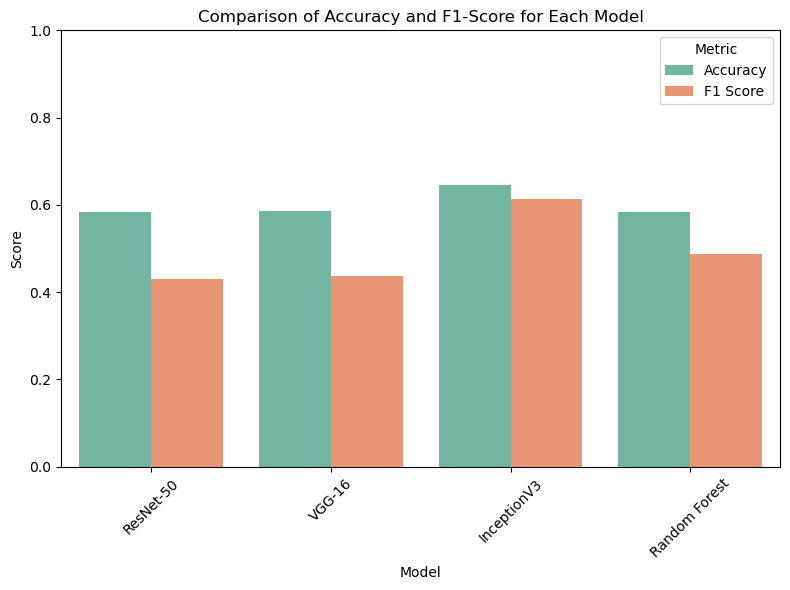

In [115]:
# Reshape the DataFrame for easier plotting
results_df_melted = results_df.melt(id_vars="Model", value_vars=["Accuracy", "F1 Score"], 
                                    var_name="Metric", value_name="Score")
# Create the combined bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_df_melted, palette="Set2")

# Titles and labels
plt.title('Comparison of Accuracy and F1-Score for Each Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel('Score')

# Show plot
plt.tight_layout()
plt.show()

# **8. Classification Reports for each Model**

In [129]:
# Classification Reports for each model
print("Classification Report for ResNet-50:") #ResNet-50
print(classification_report(y_test, model_resnet.predict(X_test).argmax(axis=1), zero_division=0))

print("Classification Report for VGG-16:") #VGG-16
print(classification_report(y_test, model_vgg.predict(X_test).argmax(axis=1), zero_division=0))

print("Classification Report for InceptionV3:") #InceptionV3
print(classification_report(y_test, model_inception.predict(X_test).argmax(axis=1), zero_division=0))

print("Classification Report for Random Forest:") #Random Forest
print(classification_report(y_test, rf_pred, zero_division=0))

Classification Report for ResNet-50:
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 630ms/step
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       244
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00        62

    accuracy                           0.58       418
   macro avg       0.19      0.33      0.25       418
weighted avg       0.34      0.58      0.43       418

Classification Report for VGG-16:
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       244
           1       0.00      0.00      0.00       112
           2       0.50      0.02      0.03        62

    accuracy                           0.59       418
   macro avg       0.36      0.34      0.26       418
weighted avg       0.42      0.59      0.44       418

Classification Report for InceptionV3:
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step
       